<a href="https://colab.research.google.com/github/ajlukasiewicz/Team_9_MacLearn/blob/Muyoung/decisionTree_randomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libaries

In [72]:
import io

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import roc_auc_score

In [11]:
from google.colab import files
uploaded = files.upload()

Saving dbcan_result.total.matrix.genome-size_10e9.tsv to dbcan_result.total.matrix.genome-size_10e9 (1).tsv


In [33]:
df = pd.read_csv(io.BytesIO(uploaded['dbcan_result.total.matrix.genome-size_10e9.tsv']), sep="\t")
print(df.shape)
df.head()

(3772, 352)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,PL39,PL4,PL40,PL41,PL42,PL5,PL6,PL7,PL8,PL9
0,2511231155,Acinetobacter,NPA,NPA,249.287412,0.0,0.000000,249.287412,249.287412,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,252.693204,0.0,252.693204,252.693204,252.693204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,253.983864,0.0,253.983864,253.983864,253.983864,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,484.588863,0.0,0.000000,242.294431,242.294431,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,250.357009,0.0,250.357009,250.357009,250.357009,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
df_without_soil = df[df["Classification"] != "soil"]
print(df_without_soil.shape)
df_without_soil.head()

(3261, 352)


,taxonID,Order,Classification,Root_info,AA1,AA10,AA12,AA3,AA4,AA5,...,PL39,PL4,PL40,PL41,PL42,PL5,PL6,PL7,PL8,PL9
0,2511231155,Acinetobacter,NPA,NPA,249.287412,0.0,0.000000,249.287412,249.287412,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2519103115,Acinetobacter,NPA,NPA,252.693204,0.0,252.693204,252.693204,252.693204,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2519899735,Acinetobacter,NPA,NPA,253.983864,0.0,253.983864,253.983864,253.983864,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2526164562,Acinetobacter,NPA,NPA,484.588863,0.0,0.000000,242.294431,242.294431,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2529293005,Acinetobacter,NPA,NPA,250.357009,0.0,250.357009,250.357009,250.357009,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [73]:
features = df_without_soil.columns[4:]
dependent_var = ["Classification"]

X = df_without_soil[features]
y = df_without_soil[dependent_var]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf1 = tree.DecisionTreeClassifier(max_depth=7, min_samples_split=10)
clf1.fit(X_train, y_train)
y_pred1 = clf1.predict(X_test)

clf2= RandomForestClassifier(max_depth=7, min_samples_split=10)
clf2.fit(X_train, y_train.values.ravel())
y_pred2 = clf2.predict(X_test)

In [74]:
print(metrics.accuracy_score(y_test, y_pred1), metrics.accuracy_score(y_test, y_pred2))

0.8486536675951718 0.871866295264624


[Text(0.5137117346938775, 0.9375, 'GT28 <= 214.672\ngini = 0.45\nsamples = 2184\nvalue = [1437, 747]\nclass = PA'),
 Text(0.23278061224489796, 0.8125, 'GT5 <= 55.375\ngini = 0.488\nsamples = 860\nvalue = [364, 496]\nclass = NPA'),
 Text(0.08290816326530612, 0.6875, 'AA1 <= 101.96\ngini = 0.419\nsamples = 271\nvalue = [190, 81]\nclass = PA'),
 Text(0.05102040816326531, 0.5625, 'CBM5 <= 69.587\ngini = 0.393\nsamples = 52\nvalue = [14, 38]\nclass = NPA'),
 Text(0.04081632653061224, 0.4375, 'GH130 <= 80.339\ngini = 0.31\nsamples = 47\nvalue = [9, 38]\nclass = NPA'),
 Text(0.030612244897959183, 0.3125, 'GT53 <= 554.757\ngini = 0.236\nsamples = 44\nvalue = [6, 38]\nclass = NPA'),
 Text(0.02040816326530612, 0.1875, 'CBM50 <= 797.549\ngini = 0.139\nsamples = 40\nvalue = [3, 37]\nclass = NPA'),
 Text(0.01020408163265306, 0.0625, 'gini = 0.097\nsamples = 39\nvalue = [2, 37]\nclass = NPA'),
 Text(0.030612244897959183, 0.0625, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = PA'),
 Text(0.0408163

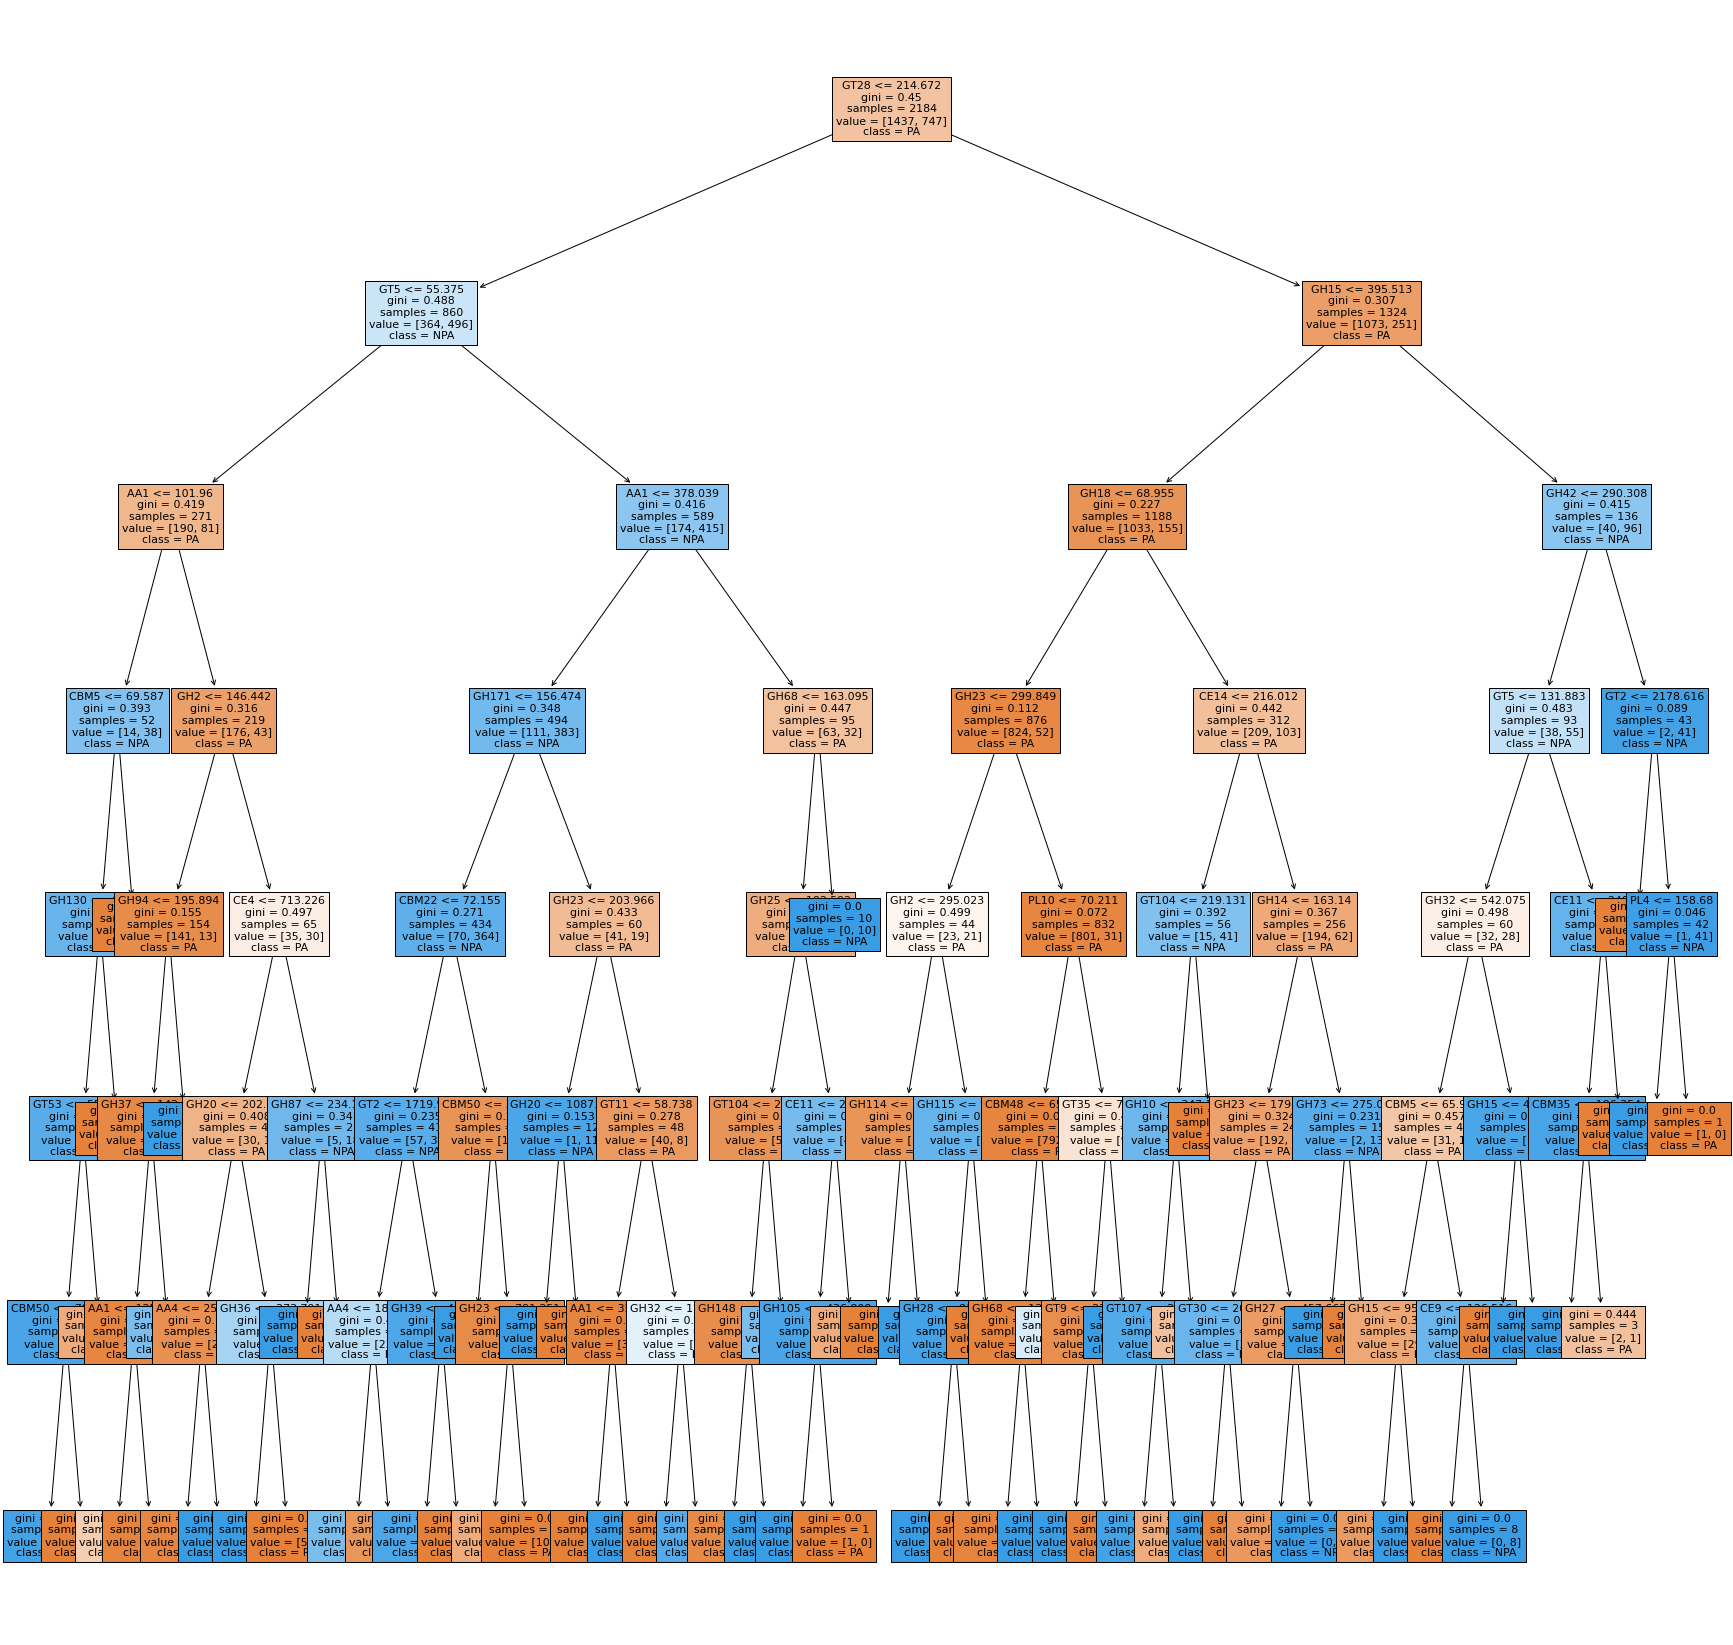

In [75]:
fig = plt.figure(figsize=(30,30))
tree.plot_tree(clf1, fontsize=11, feature_names=features, class_names=["PA", "NPA"], filled=True)